# IS 670- HW 4 : Naive Bayes

---

The file accidentsFull.csv contains information on 42,183 actual automobile accidents in 2001 in the United States that involved one of three levels of injury: NO INJURY, INJURY, or FATALITY. 

For each accident, additional information is recorded, such as day of week, weather conditions, and road type. 

A firm might be interested in developing a system for quickly classifying the severity of an accident based on initial reports and associated data in the system (some of which rely on GPS-assisted reporting).
<br>
Target variable: **MAX_SEV_IR**

Student Name:-


###1. Upload and clean data

In [1]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [2]:
# Read data
accidentsfull = pd.read_csv("accidentsFull.csv")

In [3]:
accidentsfull.keys()

Index(['HOUR_I_R', 'ALCHL_I', 'ALIGN_I', 'STRATUM_R', 'WRK_ZONE', 'WKDY_I_R',
       'INT_HWY', 'LGTCON_I_R', 'MANCOL_I_R', 'PED_ACC_R', 'RELJCT_I_R',
       'REL_RWY_R', 'PROFIL_I_R', 'SPD_LIM', 'SUR_COND', 'TRAF_CON_R',
       'TRAF_WAY', 'VEH_INVL', 'WEATHER_R', 'INJURY_CRASH', 'NO_INJ_I',
       'PRPTYDMG_CRASH', 'FATALITIES', 'MAX_SEV_IR'],
      dtype='object')

In [4]:
accidentsfull.head()

,HOUR_I_R,ALCHL_I,ALIGN_I,STRATUM_R,WRK_ZONE,WKDY_I_R,INT_HWY,LGTCON_I_R,MANCOL_I_R,PED_ACC_R,...,SUR_COND,TRAF_CON_R,TRAF_WAY,VEH_INVL,WEATHER_R,INJURY_CRASH,NO_INJ_I,PRPTYDMG_CRASH,FATALITIES,MAX_SEV_IR
0,0,2,2,1,0,1,0,3,0,0,...,4,0,3,1,1,1,1,0,0,1
1,1,2,1,0,0,1,1,3,2,0,...,4,0,3,2,2,0,0,1,0,0
2,1,2,1,0,0,1,0,3,2,0,...,4,1,2,2,2,0,0,1,0,0
3,1,2,1,1,0,0,0,3,2,0,...,4,1,2,2,1,0,0,1,0,0
4,1,1,1,0,0,1,0,3,2,0,...,4,0,2,3,1,0,0,1,0,0


In [5]:
#Converting 1,2 with YES and o with NO
accidents = accidentsfull.copy() 
accidents.loc[:, 'MAX_SEV_IR'] = accidents['MAX_SEV_IR'].replace({0: 'No', 1: 'Yes', 2:'Yes'})

C:\Users\drish\AppData\Local\Temp\ipykernel_14800\1765146600.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Yes' 'No' 'No' ... 'No' 'No' 'No']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  accidents.loc[:, 'MAX_SEV_IR'] = accidents['MAX_SEV_IR'].replace({0: 'No', 1: 'Yes', 2:'Yes'})


In [6]:
accidents['MAX_SEV_IR']

0        Yes
1         No
2         No
3         No
4         No
        ... 
42178     No
42179    Yes
42180     No
42181     No
42182     No
Name: MAX_SEV_IR, Length: 42183, dtype: object

In [7]:
# Examine missing values 
accidents.isnull().sum()

HOUR_I_R            0
ALCHL_I             0
ALIGN_I             0
STRATUM_R           0
WRK_ZONE            0
WKDY_I_R            0
INT_HWY             0
LGTCON_I_R          0
MANCOL_I_R          0
PED_ACC_R           0
RELJCT_I_R          0
REL_RWY_R           0
PROFIL_I_R          0
SPD_LIM           554
SUR_COND            0
TRAF_CON_R          0
TRAF_WAY            0
VEH_INVL            0
WEATHER_R           0
INJURY_CRASH        0
NO_INJ_I            0
PRPTYDMG_CRASH      0
FATALITIES          0
MAX_SEV_IR          0
dtype: int64

#### As you can see we have detected NULL values in SPD_LIM Column.

1. For Numerical Data:
Mean/Median Imputation → Replace with the column’s mean or median (useful for normally or skewed distributions).
Interpolation → Use linear or polynomial interpolation for time-series data.
Predictive Imputation → Use regression models or KNN to estimate missing values.
2. For Categorical Data:
Mode Imputation → Replace missing values with the most frequent category.
'Unknown' Category → Assign a new category like ‘Unknown’ or ‘Missing’.
One-Hot Encoding with Missing Indicator → Create a separate feature indicating missing values.
3. Dropping Missing Values:
If missing data is less than 5%, dropping may be fine.
If a column has too many nulls (>30-40%), consider removing it.
4. Advanced Methods:
KNN Imputation → Uses nearest neighbors to predict missing values.
ML Models (XGBoost, Random Forest) → Some models handle missing values natively.


## ❓Q1. Replace Null values with the mean in SPD_LIM Column. (2 Points)

In [8]:
#Q1 Code goes here
# Replace null values in SPD_LIM with the mean
accidents['SPD_LIM'].fillna(accidents['SPD_LIM'].mean(), inplace=True)


C:\Users\drish\AppData\Local\Temp\ipykernel_14800\163530230.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  accidents['SPD_LIM'].fillna(accidents['SPD_LIM'].mean(), inplace=True)


In [9]:
#Examine null values after imputation
accidents.isnull().sum()

HOUR_I_R          0
ALCHL_I           0
ALIGN_I           0
STRATUM_R         0
WRK_ZONE          0
WKDY_I_R          0
INT_HWY           0
LGTCON_I_R        0
MANCOL_I_R        0
PED_ACC_R         0
RELJCT_I_R        0
REL_RWY_R         0
PROFIL_I_R        0
SPD_LIM           0
SUR_COND          0
TRAF_CON_R        0
TRAF_WAY          0
VEH_INVL          0
WEATHER_R         0
INJURY_CRASH      0
NO_INJ_I          0
PRPTYDMG_CRASH    0
FATALITIES        0
MAX_SEV_IR        0
dtype: int64

In [10]:
# Examine variable type
accidents.dtypes

HOUR_I_R            int64
ALCHL_I             int64
ALIGN_I             int64
STRATUM_R           int64
WRK_ZONE            int64
WKDY_I_R            int64
INT_HWY             int64
LGTCON_I_R          int64
MANCOL_I_R          int64
PED_ACC_R           int64
RELJCT_I_R          int64
REL_RWY_R           int64
PROFIL_I_R          int64
SPD_LIM           float64
SUR_COND            int64
TRAF_CON_R          int64
TRAF_WAY            int64
VEH_INVL            int64
WEATHER_R           int64
INJURY_CRASH        int64
NO_INJ_I            int64
PRPTYDMG_CRASH      int64
FATALITIES          int64
MAX_SEV_IR         object
dtype: object

In [11]:
# Change categorical variables to "category"
accidents['SPD_LIM']=accidents['SPD_LIM'].astype('int64')
accidents['MAX_SEV_IR']=accidents['MAX_SEV_IR'].astype('category')

In [12]:
# Examine variable type
accidents.dtypes

HOUR_I_R             int64
ALCHL_I              int64
ALIGN_I              int64
STRATUM_R            int64
WRK_ZONE             int64
WKDY_I_R             int64
INT_HWY              int64
LGTCON_I_R           int64
MANCOL_I_R           int64
PED_ACC_R            int64
RELJCT_I_R           int64
REL_RWY_R            int64
PROFIL_I_R           int64
SPD_LIM              int64
SUR_COND             int64
TRAF_CON_R           int64
TRAF_WAY             int64
VEH_INVL             int64
WEATHER_R            int64
INJURY_CRASH         int64
NO_INJ_I             int64
PRPTYDMG_CRASH       int64
FATALITIES           int64
MAX_SEV_IR        category
dtype: object

###2. Partition the data set for Naive bayes model

In [13]:
# Examine the porportion of target variable for data set
y = accidents['MAX_SEV_IR']
print(y.value_counts(normalize=True))

MAX_SEV_IR
Yes    0.508783
No     0.491217
Name: proportion, dtype: float64


## As we can see Target variable is already balanced.

## ❓Q2. Split the dataset to 60/40 Ratio for Train/Test in below code cell. (1pt)

In [14]:
# Partition the data
x = accidents.drop(['MAX_SEV_IR'],axis=1)
y = accidents['MAX_SEV_IR']

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.40, random_state=0) 
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(25309, 23) (16874, 23) (25309,) (16874,)


## 3. Naive Bayes model prediction

In [15]:
# Build a Naive Bayes model on training data with default setting
model_NB = MultinomialNB()
model_NB.fit(x_train, y_train)

MultinomialNB()

## ❓Q3. Make prediction on testing data. (1pt)

In [16]:
# Make predictions on testing data

prediction_on_test = model_NB.predict(x_test)

## ❓Q4. Create a confusion matrix on prediction_on_test. (1pt)

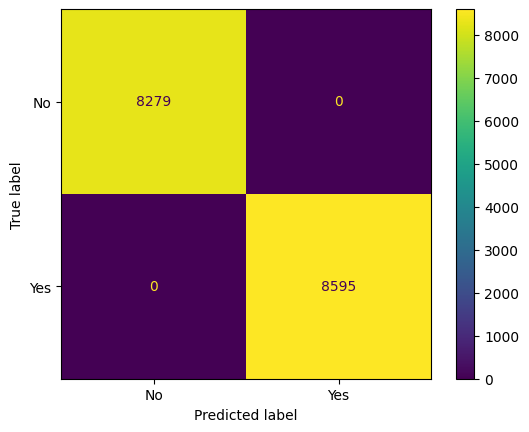

In [17]:
# Examine the evaluation results on testing data: confusion_matrix
cm_NB = confusion_matrix(y_test, prediction_on_test )
ConfusionMatrixDisplay(confusion_matrix=cm_NB, display_labels=model_NB.classes_).plot()


## ❓Q5. Calculate False Negatives from above Confusion Matrix. (1pt)

In [18]:
false_negatives = cm_NB[1, 0]
print(f"False Negatives: {false_negatives}")

False Negatives: 0


## ❓Q6. Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score (1 point)

In [19]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, prediction_on_test)
precision = precision_score(y_test, prediction_on_test, pos_label='Yes')
recall = recall_score(y_test, prediction_on_test, pos_label='Yes')
f1 = f1_score(y_test, prediction_on_test, pos_label='Yes')

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


## ❓Q7. a)Evaluate the model using above scores.(1pt)

Accuracy: 1.00<br>
Precision: 1.00<br>
Recall: 1.00<br>
F1 Score: 1.00


## ❓Q8. Why do you think model performs perfect on this dataset? Give reasons.(1pt)

## The model has perfect performance with 100% accuracy, precision, recall, and F1-score. This is unusual and may be due to one of the following possible reasons:

## Data Leakage:

The model might have learned information from the test data accidentally during training.

This can happen if there is overlap between train and test data or if some preprocessing operations revealed target information to the model.

## Overfitting:

Overfitting occurs when the model is memorizing the training data and performing exceedingly well on the test set but may not generalize to new, unseen data.
 
Since Naive Bayes is a relatively simple model, perfection may be an indication that the model is memorizing patterns instead of learning helpful generalizations.
 
## Highly Predictive Features:
 
If the dataset contains features that are highly predictive of the target variable, then the model may be able to predict with very high accuracy.

But in the real world, one must distrust such perfect correlations and check them.

## Small or Homogeneous Dataset:

If the dataset is too small or homogeneous, it's possible for the model to fit perfectly, and the scores will be high.

## ❓Q9.Do you think this Niave Bayes model is overfitting? Why? explain it.(1pt)

## Yes, there are good signs that this Naive Bayes model might be overfitting based on the following:

## Perfect Evaluation Scores:

Achieving near 100% accuracy, precision, recall, and F1-score is a sign that the model has memorized the training data too well, which is a symptom of overfitting.

## Lack of Generalization:

Overfit models perform perfectly with training or test data but fail to generalize to new, unseen data.

Although Naive Bayes is less prone to overfitting than more complex models, perfect scores also indicate that the model is not learning generalizable patterns.

## Cross-validation Check:

Cross-validation would show high variance between validation and training scores when the model overfits.

If the validation performance is drastically worse than the training performance, then it's sure overfitting.

## Feature Redundancy or Leakage

If there is any feature incidentally having information about the target variable, the model can learn to exploit this and give a deceptive result of perfect classification.

-------------------------------------

ENTER YOUR CSULB ID:- Drishtee.gupta01@student.csulb.edu | 033638837